https://stepik.org/lesson/1370094/step/6

Matrix([
[0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 20.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, 20.0,  0.0,  0.0, 

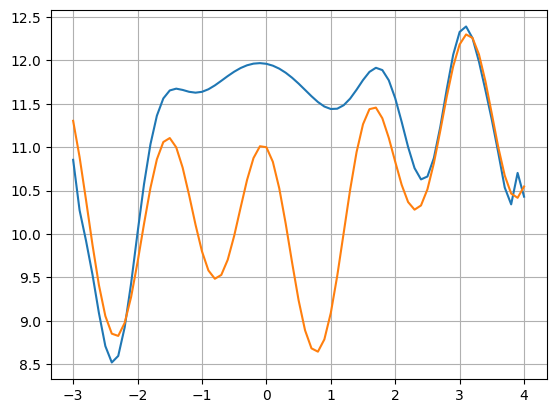

In [ ]:
# @title Линейная регрессии с регуляризацией (метод нормальных уравнений)
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix


def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10

x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем
# display(Matrix(IL)) # глянуть на матрицу λI

X_train = X[::2]  # обучающая выборка (входы)
# display(Matrix(X_train))  # глянуть на матрицу
Y_train = y[::2]  # обучающая выборка (целевые значения)

# вычисление коэффициентов по формуле w = (XT*X + lambda*I)^-1 * XT * Y
A = np.linalg.inv(X_train.T @ X_train + IL)
# display(Matrix(A))        # глянуть на матрицу

w = A @ X_train.T @ Y_train
Q = ((X_train @ w - Y_train)**2).mean() # итоговое качество

# print(w)
# print(Q)

# отображение исходного графика и прогноза
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy)
plt.plot(x, y)
plt.grid(True)
plt.show()

Метод нормальных уравнений для линейной регрессии позволяет находить коэффициенты модели без необходимости использовать градиентные шаги, что делает его аналитическим подходом к решению задачи. Основная причина, по которой этот метод работает без градиентного спуска, заключается в том, что он использует прямое решение системы линейных уравнений.

## Принцип работы метода нормальных уравнений

1. **Формулировка задачи**: Линейная регрессия стремится минимизировать функцию потерь, обычно это сумма квадратов ошибок (RSS). Для этого мы ищем такие параметры $ w $, которые минимизируют разность между предсказанными и фактическими значениями.

2. **Нормальные уравнения**: Решение задачи минимизации можно выразить через нормальные уравнения:
   $$
   w = (X^T X + \lambda I)^{-1} X^T Y
   $$
   где $ X $ — матрица признаков, $ Y $ — вектор целевых значений, $ \lambda $ — параметр регуляризации, а $ I $ — единичная матрица. Это уравнение позволяет получить оптимальные значения $ w $ непосредственно, без итеративного процесса.

3. **Отсутствие градиентного спуска**: В отличие от методов, основанных на градиентном спуске, где требуется многократное обновление параметров с использованием производных функции потерь, метод нормальных уравнений предоставляет решение в одном шаге, что значительно упрощает процесс обучения модели.

## Преимущества и недостатки

- **Преимущества**:
  - Быстрое получение точного решения при небольшом числе признаков.
  - Простота реализации и понимания.

- **Недостатки**:
  - Высокая вычислительная сложность при большом количестве признаков из-за необходимости вычисления обратной матрицы $ (X^T X + \lambda I)^{-1} $.
  - Чувствительность к мультиколлинеарности (высокой корреляции между признаками), что может привести к нестабильным оценкам коэффициентов.

В результате метод нормальных уравнений является эффективным инструментом для решения задач линейной регрессии в условиях, когда число признаков не слишком велико и нет проблем с мультиколлинеарностью.

Citations:
[1] https://habr.com/ru/articles/804135/

[2] https://ru.stackoverflow.com/questions/1497083/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0-%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B9-%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8

[3] https://aws.amazon.com/ru/what-is/linear-regression/

[4] https://www.hse.ru/mirror/pubs/share/503533256.pdf

[5] https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F

[6] https://polyakov.imamod.ru/arc/stud/popov/lecture_18.pdf